# Case_study_4_4

Train a vanilla two-layer neural network for a regression problem using Adam optimiser.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from local.lib.utils import forward, backward

In [ ]:
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

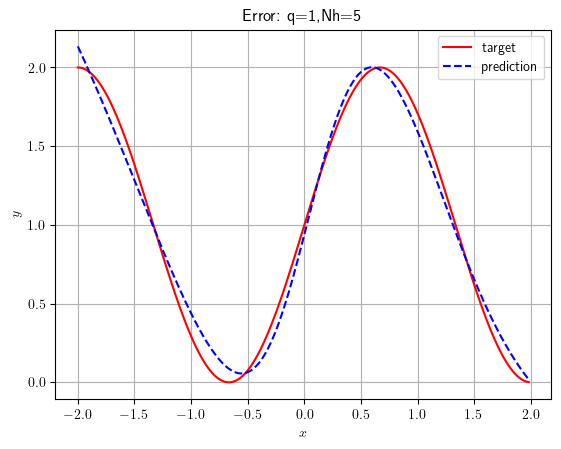

In [2]:
# Main parameters
mu=0.001               # Step size
Ns=100000              # Number of samples
Nh=5                   # Number of neurons hidden layer
Ni=1                   # Number of inputs
No=1                   # Number of outputs
In=3
eps = 1e-8
beta1 = 0.9
beta2 = 0.999


# Defining the input and the desired signals
x=(np.random.rand(Ns)-.5)*4
y=1+np.sin(In*np.pi/4*x);
# Defining the variables (weights and bias)
W1=np.zeros((Nh,Ni,Ns+1))            # Weights hidden layer
W2=np.zeros((No,Nh,Ns+1))            # Weights output layer
W1[:,:,0]=np.random.rand(Nh,Ni)      # Initialization
W2[:,:,0]=np.random.rand(No,Nh)      # Initialization
b1=np.zeros((Nh,Ns+1))               # Bias hidden layer
b1[:,0]=(np.random.rand(Nh)-.5)*4    # Iitialization
b2=np.zeros((No,Ns+1));              # Bias output layer
b2[:,0]=(np.random.rand(No)-.5)*4    # Initialization
tipo='linear'                        # Output nonlinearity
e=np.zeros(Ns);                      # Error signal

v1 = np.zeros((Nh,Ni))               #First momentum hidden layer
v2 = np.zeros((No,Nh))               #First momentum output layer
g1 = np.zeros((Nh,Ni))               #Second momentum hidden layer
g2 = np.zeros((No,Nh))               #Second momentum output layer

# Loop along the samples including the forward and backward steps

for k in range(Ns):
    z0=[x[k]];
    z1,z2,_,_=forward(W1[:,:,k],W2[:,:,k],b1[:,k],b2[:,k],z0,tipo);
    e[k]=y[k]-z2;
    delta2, delta1=backward(W2[:,:,k],z1,z2,e[k],tipo);
    v2 = beta1*v2 + (1 - beta1)*delta2*z1.T
    v2n = v2/(1-beta1**(k+1))
    v1 = beta1*v1 + (1 - beta1)*delta1*z0
    v1n = v1/(1-beta1**(k+1))
    g2 = beta2*g2 + (1 - beta2)*((delta2*z1.T)**2)
    g2n = g2/(1-beta2**(k+1))
    g1 = beta2*g1 + (1 - beta2)*((delta1*z0)**2)
    g1n = g1/(1-beta2**(k+1))
    W2[:,:,k+1]=W2[:,:,k]+2*(mu/(np.sqrt(g2n)+eps))*v2n
    b2[0,k+1]=b2[0,k]+mu*2*delta2
    W1[:,:,k+1]=W1[:,:,k]+(mu/(np.sqrt(g1n)+eps))*2*v1n;
    b1[:,k+1]=b1[:,k]+mu*2*delta1.flatten();

# How to present results    
test=np.arange(-2,2,.02)
reg=np.zeros(test.shape);
for k in range(len(test)):
    _, temp, _, _ =forward(W1[:,:,Ns],W2[:,:,Ns],b1[:,Ns],b2[0,Ns],[test[k]],'linear');
    reg[k] = temp
plt.rcParams['text.usetex'] = True
plt.plot(test,1+np.sin(In*np.pi/4*test),color='r',label='target')
plt.plot(test,reg, color = 'b', linestyle = 'dashed',label = 'prediction')
plt.legend()
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(f'Error: q=1,Nh={Nh}')
plt.show()

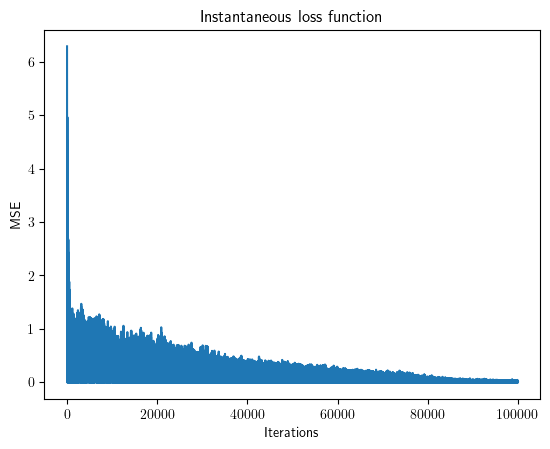

In [5]:
plt.plot(e**2)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Instantaneous loss function')
plt.show()